<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# MLS/Aura Level 3 - Monthly Binned Carbon Monoxide (CO)

### About

The [Microwave Limb Sounder (MLS)](https://disc.gsfc.nasa.gov/information/data-release?title=New%20MLS%20v4.2%20Level%203%20Gridded%20Data%20Products%20Released ) is an instrument onboard the Earth Observing System (EOS) Aura spacecraft. It measures naturally-occurring microwave thermal emission from the limb (edge) of Earth's atmosphere to remotely sense vertical profiles of atmospheric gases, temperature, pressure, and cloud ice. 

MLS Level 3 data are geophysical products that are binned onto regular grids. They are disseminated in `netCDF` format. You can learn more about the MLS data products by reading the [MLS v4 Data Quality Document](https://mls.jpl.nasa.gov/data/v4-2_data_quality_document.pdf).

This notebook features the [MLS/Aura Level 3 Monthly Binned Carbon Monoxide (CO) Mixing Ration on Assorted Grids V004 (ML3MBCO)](https://disc.gsfc.nasa.gov/datasets/ML3MBCO_004/summary?keywords=mls%2Faura%20level%203%20carbon) product. It specifically highlights for August 2020 the Carbon Monoxide valuese on different vertical levels.


### Basic Facts

> **Spatial resolution**: `4 deg x 5 deg`<br>
> **Vertical resolution**: `3-6 km`<br>
> **Spatial coverage**: `Lat: 82.0 to -82.0 deg, Lon: -180.0 to 180.0 deg` <br>
> **Temporal**: `Level 3 - Monthly` <br>
> **Data availability**: `2 Aug 2004 to 1 January 2023`


### How to access the data

MLS data are distributed via the [NASA Goddard Space Flight Center Earth Science Data and Information Services Center (GES-DISC)](https://disc.gsfc.nasa.gov/).

You need to [register for an Earthdata account](https://urs.earthdata.nasa.gov/) in order to be able to download data. 


### Module outline
* [1 - Load and browse MLS CO Level 3 data](#load)
* [2 - Visualize MLS CO Level 3 data](#visualize)

<hr>

#### Load required libraries

In [2]:
import xarray as xr
import numpy as np

import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [3]:
%run ../functions.ipynb

<hr>

## <a id="load"></a>Load and browse the ML3MBCO product

The monthly binned MLS/Aura products are disseminated as `netCDF` files. Each MLS Monthly Binned Level 3 file is organised in six groups:

- `<product> PressureGrid`: 4°×5° geodetic longitude/latitude grid on pressure surfaces
- `<product> ThetaGrid`: 4°×5° geodetic longitude/latitude grid on potential temperature surfaces
- `<product> PressureZM`: 4° geodetic latitude zonal mean on pressure surfaces
- `<product> ThetaZM`: 4° geodetic latitude zonal mean on potential temperature surfaces
- `<product> EqlZM`: 4° equivalent latitude zonal mean on potential temperature surfaces
- `<product> VortexAvg`: Polar vortex average values for each hemisphere on potential temperature surfaces.

`xarray`'s function `open_dataset` enables you to open a `netCDF` file. In order to load the variable as part of the MLS Monthly Binned Level 3 file, you have to specify the following keyword arguments, replacing `<product>` with the product name, e.g. `CO`: 
- `group='CO PressureGrid'`: to load the `CO PressureGrid` group.

In [4]:
file_name_co = '../../eodata/acam_training_school/MLS/MLS-Aura_L3MB-CO_v04-23-c01_2020.nc'
file_co = xr.open_dataset(file_name_co, group='CO PressureGrid')
file_co

<xarray.Dataset>
Dimensions:          (lon: 72, nv: 2, lat: 45, time: 12, lev: 37)
Coordinates:
  * lon              (lon) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat              (lat) float32 -88.0 -84.0 -80.0 -76.0 ... 80.0 84.0 88.0
  * time             (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15
  * lev              (lev) float32 1e+03 681.3 464.2 ... 2.154e-05 1e-05
Dimensions without coordinates: nv
Data variables:
    lon_bnds         (lon, nv) float32 ...
    lat_bnds         (lat, nv) float32 ...
    time_bnds        (time, nv) datetime64[ns] ...
    value            (time, lev, lon, lat) float32 ...
    rms_uncertainty  (time, lev, lon, lat) float32 ...
    minimum          (time, lev, lon, lat) float32 ...
    maximum          (time, lev, lon, lat) float32 ...
    std_dev          (time, lev, lon, lat) float32 ...
    nvalues          (time, lev, lon, lat) float64 ...
Attributes:
    VerticalCoordinate:   Pressure
    LatLonGridType:       Geodetic
    LatitudeResolution:   4.0
    LongitudeResolution:  5.0
    DataSubset:           None

MLS `<product> PressureGrid` and `<product> ThetaGrid` product groups have four **dimensions**:
* `lon`: the longitude at center of the grid cell 
* `lat`: the latitude at center of the grid cell
* `time`: the date of the grid cell (days since 1950-01-01)
* `lev`: the vertical coordinate (i.e. pressure/potential temperature values)

You see that the loaded data object also contains nine **data variables**:
* `lon_bnds`: the longitude at the boundaries of the grid cell
* `lat_bnds`: the latitude at the boundaries of the grid cell
* `time_bnds`: the boundaries of the time period (days since 1950-01-01)
* `value`: the average value for each bin
* `rms_uncertainty`: the root mean square of all the Level 2 L2GPPrecision values that contributed to each bin (note that this has not been divided by √nvalues)
* `minimum`: the minimum value in each bin
* `maximum`: the maximum value in each bin
* `std_dev`: the standard deviation of the data in each bin
* `nvalues`: the number of valid data points found in each bin


If you examine the `time` coordinate, you will notice that the dataset has 12 timesteps: one for each month of the year 2020.

### Retrieve the variable `value` as xarray.DataArray

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `value` is the 'Average Value of Carbon Monoxide', has the unit `vmr` and has four dimensions, `time`, `lev`, `lon` and `lat` respectively. Note that `vmr` stands for volume mixing ratio.

In [5]:
co = file_co['value']
co

<xarray.DataArray 'value' (time: 12, lev: 37, lon: 72, lat: 45)>
[1438560 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2020-12-15
  * lev      (lev) float32 1e+03 681.3 464.2 316.2 ... 4.642e-05 2.154e-05 1e-05
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

You can retrieve the array values of the variable with squared brackets: `[:,:,:,:]`, which corresponds to the dimensions in this order: `[time, lev, lon, lat]`. One single time step can be selected by specifying one value of the `time` dimension, e.g. `[4,:,:,:]`. This corresponds to selecting the data for the month of May 2020.

In [6]:
co_2020_05 = co[4,:,:,:]
co_2020_05

<xarray.DataArray 'value' (lev: 37, lon: 72, lat: 45)>
[119880 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-05-15
  * lev      (lev) float32 1e+03 681.3 464.2 316.2 ... 4.642e-05 2.154e-05 1e-05
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

Now, we want to retrieve the data at two levels: `100 hPa` and `215 hPa`. 

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`, which corresponds to the dimensions in this order: `[lev, lon, lat]`. One level can be selected by specifying one value of the `lev` dimension, e.g. `[6,:,:]`. This corresponds to selecting the data for `100 hPa`.

In [7]:
co_2020_05_100hpa = co_2020_05[6,:,:]
co_2020_05_100hpa

<xarray.DataArray 'value' (lon: 72, lat: 45)>
array([[         nan,          nan, 4.579514e-08, ..., 3.672816e-08,
                 nan,          nan],
       [         nan,          nan, 4.784095e-08, ..., 3.409021e-08,
                 nan,          nan],
       [         nan,          nan, 4.368478e-08, ..., 3.859172e-08,
                 nan,          nan],
       ...,
       [         nan,          nan, 4.452845e-08, ..., 3.288580e-08,
                 nan,          nan],
       [         nan,          nan, 4.756984e-08, ..., 3.435051e-08,
                 nan,          nan],
       [         nan,          nan, 4.675492e-08, ..., 3.244408e-08,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-05-15
    lev      float32 100.0
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

Next, you can retrieve the data at `215 hPa`. 

In [8]:
co_2020_05_215hpa = co_2020_05[4,:,:]
co_2020_05_215hpa

<xarray.DataArray 'value' (lon: 72, lat: 45)>
array([[         nan,          nan, 4.280238e-08, ..., 5.778686e-08,
                 nan,          nan],
       [         nan,          nan, 4.065373e-08, ..., 5.897762e-08,
                 nan,          nan],
       [         nan,          nan, 4.498710e-08, ..., 5.876791e-08,
                 nan,          nan],
       ...,
       [         nan,          nan, 4.318653e-08, ..., 5.435404e-08,
                 nan,          nan],
       [         nan,          nan, 4.449787e-08, ..., 5.794383e-08,
                 nan,          nan],
       [         nan,          nan, 4.516133e-08, ..., 5.932828e-08,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-05-15
    lev      float32 215.4
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

To do this in a single step, we can use `[4,6,:,:]` for `100 hPa` and `[4,4,:,:]` for `215 hPa` for May 2020.

In [9]:
co_2020_05_100hpa = co[4,6,:,:]
co_2020_05_100hpa

<xarray.DataArray 'value' (lon: 72, lat: 45)>
array([[         nan,          nan, 4.579514e-08, ..., 3.672816e-08,
                 nan,          nan],
       [         nan,          nan, 4.784095e-08, ..., 3.409021e-08,
                 nan,          nan],
       [         nan,          nan, 4.368478e-08, ..., 3.859172e-08,
                 nan,          nan],
       ...,
       [         nan,          nan, 4.452845e-08, ..., 3.288580e-08,
                 nan,          nan],
       [         nan,          nan, 4.756984e-08, ..., 3.435051e-08,
                 nan,          nan],
       [         nan,          nan, 4.675492e-08, ..., 3.244408e-08,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-05-15
    lev      float32 100.0
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

In [10]:
co_2020_05_215hpa = co[4,4,:,:]
co_2020_05_215hpa

<xarray.DataArray 'value' (lon: 72, lat: 45)>
array([[         nan,          nan, 4.280238e-08, ..., 5.778686e-08,
                 nan,          nan],
       [         nan,          nan, 4.065373e-08, ..., 5.897762e-08,
                 nan,          nan],
       [         nan,          nan, 4.498710e-08, ..., 5.876791e-08,
                 nan,          nan],
       ...,
       [         nan,          nan, 4.318653e-08, ..., 5.435404e-08,
                 nan,          nan],
       [         nan,          nan, 4.449787e-08, ..., 5.794383e-08,
                 nan,          nan],
       [         nan,          nan, 4.516133e-08, ..., 5.932828e-08,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-05-15
    lev      float32 215.4
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

Now, let us retrieve the data and store them in separate variables for the months of June, July, August and September 2020 for both `100 hPa` and `250 hPa` levels.

In [11]:
# June 2020
co_2020_06_100hpa = co[5,6,:,:]
co_2020_06_215hpa = co[5,4,:,:]

# July 2020
co_2020_07_100hpa = co[6,6,:,:]
co_2020_07_215hpa = co[6,4,:,:]

# August 2020
co_2020_08_100hpa = co[7,6,:,:]
co_2020_08_215hpa = co[7,4,:,:]

# September 2020
co_2020_09_100hpa = co[8,6,:,:]
co_2020_09_215hpa = co[8,4,:,:]

Let us check the data at both levels for September 2020 to make sure we have done this correctly.

In [12]:
co_2020_09_100hpa

<xarray.DataArray 'value' (lon: 72, lat: 45)>
array([[         nan,          nan, 3.438482e-08, ..., 3.814581e-08,
                 nan,          nan],
       [         nan,          nan, 3.179960e-08, ..., 3.345834e-08,
                 nan,          nan],
       [         nan,          nan, 3.101025e-08, ..., 3.556110e-08,
                 nan,          nan],
       ...,
       [         nan,          nan, 3.006750e-08, ..., 3.755859e-08,
                 nan,          nan],
       [         nan,          nan, 3.179825e-08, ..., 3.635739e-08,
                 nan,          nan],
       [         nan,          nan, 3.305765e-08, ..., 3.956220e-08,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-09-15
    lev      float32 100.0
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

In [13]:
co_2020_09_215hpa

<xarray.DataArray 'value' (lon: 72, lat: 45)>
array([[         nan,          nan, 4.804392e-08, ..., 4.939515e-08,
                 nan,          nan],
       [         nan,          nan, 4.790673e-08, ..., 5.156409e-08,
                 nan,          nan],
       [         nan,          nan, 4.590835e-08, ..., 5.116067e-08,
                 nan,          nan],
       ...,
       [         nan,          nan, 4.152842e-08, ..., 5.409848e-08,
                 nan,          nan],
       [         nan,          nan, 4.877896e-08, ..., 4.860120e-08,
                 nan,          nan],
       [         nan,          nan, 4.733513e-08, ..., 5.566321e-08,
                 nan,          nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
    time     datetime64[ns] 2020-09-15
    lev      float32 215.4
Attributes:
    long_name:  Average Value of Carbon Monoxide
    units:      vmr
    comments:   The average value in a bin

##  <a id="visualize"></a>Visualize the MLS CO Level 3 data

The final step is to visualize the gridded data with the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).

The following keyword arguments have to be defined:
* `data_array`: data array with the variable
* `longitude`: array with longitude values
* `latitude`: array with latitude values
* `projection`: define desired Cartopy projection
* `color palette`: choose a matplotlib colormap
* `unit`: Define the unit of the variable
* `long_name`: Define the title of the resulting map
* `vmin`: Define minimum value
* `vmax`: Define maximum value

We need to transpose the dataset using xarray's `transpose()` function in order to plot the data array correctly.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Average Value of Carbon Monoxide (100 hPa) for 2020-08'}>)

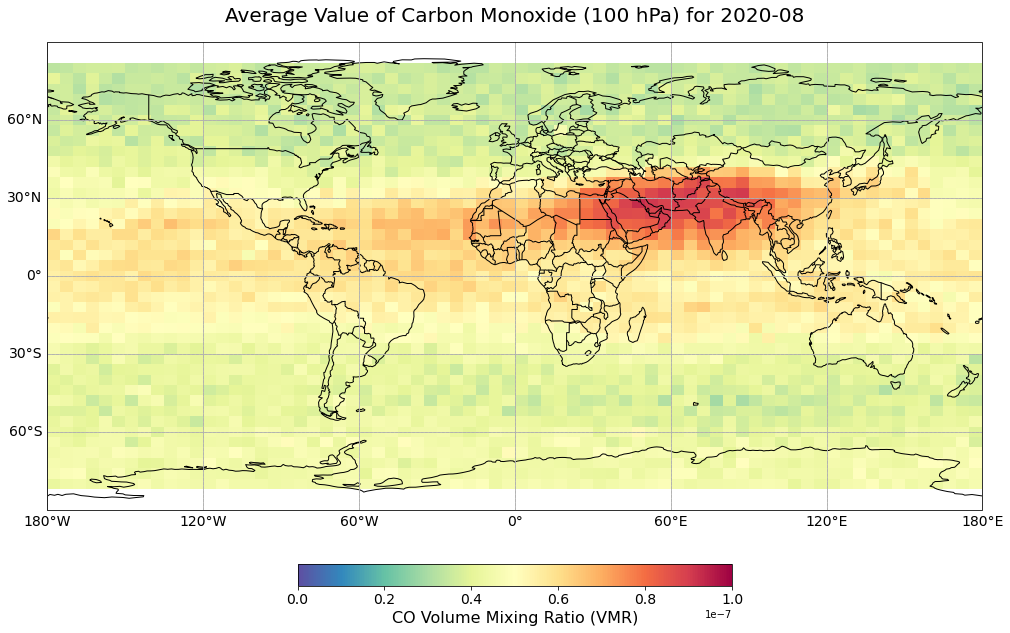

In [16]:
visualize_pcolormesh(data_array=co_2020_08_100hpa.transpose(), 
                     longitude=co_2020_08_100hpa.lon, 
                     latitude=co_2020_08_100hpa.lat, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='Spectral_r', 
                     unit='CO Volume Mixing Ratio (VMR)', 
                     long_name=co_2020_08_100hpa.long_name + ' (100 hPa) for ' + str(co_2020_08_100hpa.time.data)[0:7], 
                     vmin=0, 
                     vmax=1e-07)

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Average Value of Carbon Monoxide (215 hPa) for 2020-08'}>)

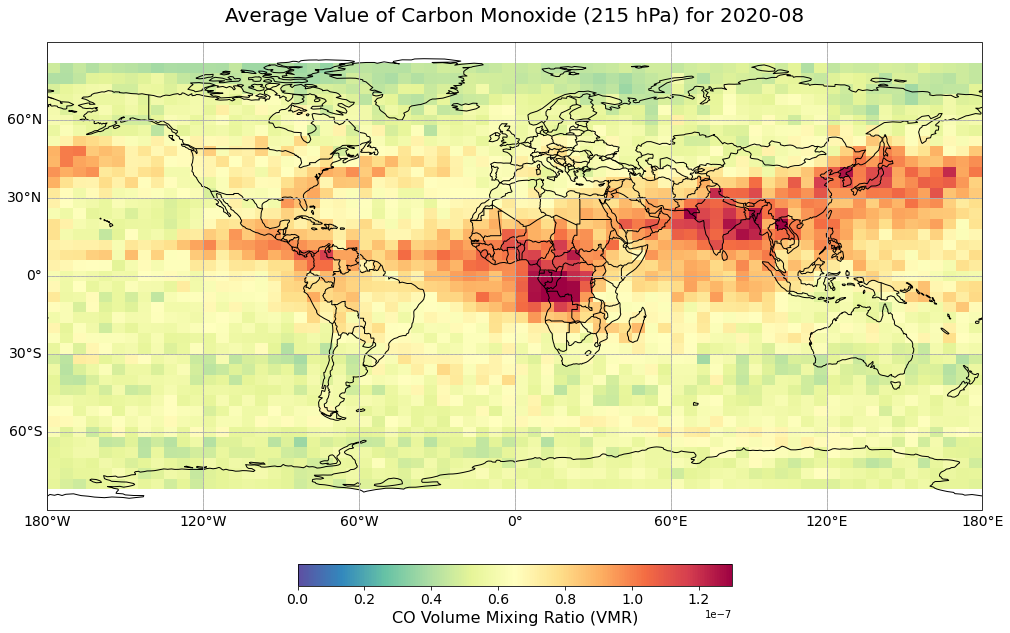

In [17]:
visualize_pcolormesh(data_array=co_2020_08_215hpa.transpose(), 
                     longitude=co_2020_08_215hpa.lon, 
                     latitude=co_2020_08_215hpa.lat, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='Spectral_r', 
                     unit='CO Volume Mixing Ratio (VMR)', 
                     long_name=co_2020_08_215hpa.long_name + ' (215 hPa) for ' + str(co_2020_08_215hpa.time.data)[0:7], 
                     vmin=0, 
                     vmax=1.3e-07)

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>